In [ ]:
# Simple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# method for uploading data from local drive: https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/
from google.colab import files
uploaded = files.upload()

Saving netflix-rotten-tomatoes-imdb_labeled copy.csv to netflix-rotten-tomatoes-imdb_labeled copy.csv


In [ ]:
# Importing the dataset
import io
dataset = pd.read_csv(io.BytesIO(uploaded['netflix-rotten-tomatoes-imdb_labeled copy.csv']))

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3728 entries, 0 to 3727
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Series or Movie        3728 non-null   object 
 1   IMDb Score             3728 non-null   float64
 2   Rotten Tomatoes Score  3728 non-null   int64  
 3   Awards Received        3728 non-null   int64  
 4   Awards Nominated For   3728 non-null   int64  
 5   Boxoffice              3728 non-null   int64  
 6   Hidden Gem Score       3728 non-null   float64
 7   Good Score             3728 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 233.1+ KB


In [ ]:
# discontinuous columns https://stackoverflow.com/questions/50143469/pandas-dataframe-select-multiple-discontinuous-columns-slices
X = dataset.iloc[:, [1]].values
y = dataset.iloc[:, 6].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
#Performance metrics
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.008717925860649
2.222980152969743
1.4909661810281758


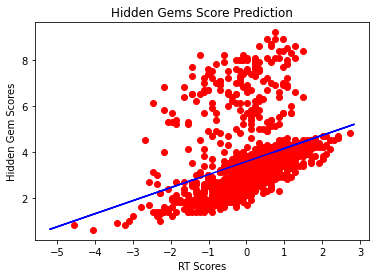

In [ ]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hidden Gems Score Prediction')
plt.xlabel('RT Scores')
plt.ylabel('Hidden Gem Scores')
plt.show()

In [ ]:
#All Hidden gem scores changed to Good Score label "1" and all 6.9 and below to Not a Good Score "0" 
#for Binary classification

In [ ]:
# discontinuous columns https://stackoverflow.com/questions/50143469/pandas-dataframe-select-multiple-discontinuous-columns-slices
X = dataset.iloc[:, [1,2]].values
y = dataset.iloc[:, 7].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)

[[1043    1]
 [  74    1]]


In [ ]:
#Performance metrics
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is %f' % accuracy)
	 
# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision is %f' % precision)

Accuracy is 0.932976
Precision is 0.500000


In [ ]:
# Support Vector Machine (SVM)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1044    0]
 [  75    0]]


In [ ]:
#Performance metrics
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is %f' % accuracy)
	 
# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision is %f' % precision)

Accuracy is 0.932976
Precision is 0.000000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Random Forest Classification
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Performance metrics
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is %f' % accuracy)
	 
# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision is %f' % precision)

[[ 81   0]
 [  0 138]]
Accuracy is 1.000000
Precision is 1.000000
